## 様々なサポートベクトルマシンの比較
* 本実習は[総合実験（１〜４日目）](http://nbviewer.jupyter.org/github/maskot1977/ipython_notebook/blob/master/%E7%B7%8F%E5%90%88%E5%AE%9F%E9%A8%93%EF%BC%91%E6%97%A5%E7%9B%AE.ipynb)の内容を全て理解していることを前提としています。

* まずは [Plot different SVM classifiers in the iris dataset](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html) のサンプルプログラムから。

Automatically created module for IPython interactive environment


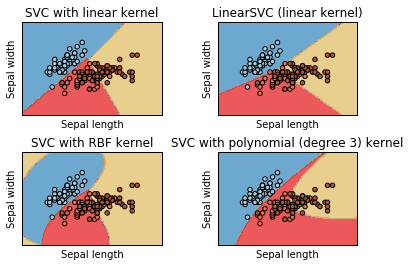

In [1]:
%matplotlib inline
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

### より汎用的に使えるように改変してみました。
* タブ区切りのファイルを読み込み、PCAで次元圧縮し、様々なSVMを行う流れを作ってみました。

In [2]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
import urllib
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/iris.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
urllib.urlretrieve(url, 'iris.txt')
import pandas as pd # データフレームワーク処理のライブラリをインポート
df = pd.read_csv("iris.txt", sep='\t', na_values=".") # データの読み込み

In [3]:
def conduct_PCA(df):
    #import sklearn #機械学習のライブラリ
    from sklearn.decomposition import PCA #主成分分析器
    #主成分分析の実行
    pca = PCA()
    pca.fit(df.iloc[:, 1:5])
    # データを主成分空間に写像 = 次元圧縮
    feature = pca.transform(df.iloc[:, 1:5])
    # 既知ラベルの名前を、0, 1, 2 などの数字に置き換えます。
    target_names = []
    target = []
    for word in df[df.columns[5]]:
        if word not in target_names:
            target_names.append(word)
        target.append(target_names.index(word))
    return feature, target

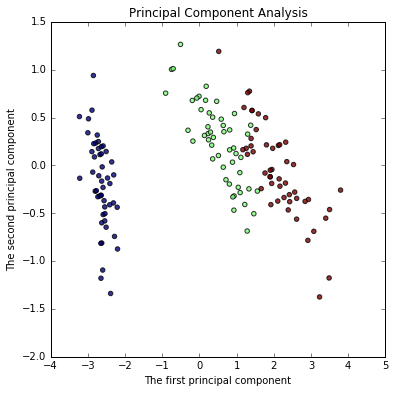

In [4]:
feature, target = conduct_PCA(df)
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=target)
plt.title("Principal Component Analysis")
plt.xlabel("The first principal component")
plt.ylabel("The second principal component")
plt.show()

In [5]:
from sklearn import cross_validation as cv
def compare_SVM(X, y):
    C = 1.0  # SVM regularization parameter
    lin_svc = svm.LinearSVC(C=C).fit(X, y)
    svc = svm.SVC(kernel='linear', C=C).fit(X, y)
    rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
    rbf_svc5 = svm.SVC(kernel='rbf', gamma=0.5, C=C).fit(X, y)
    poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
    poly_svc4 = svm.SVC(kernel='poly', degree=4, C=C).fit(X, y)
    poly_svc5 = svm.SVC(kernel='poly', degree=5, C=C).fit(X, y)

    # title for the plots
    titles = ['SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel (gamma=0.7)',
              'SVC with RBF kernel (gamma=0.5)',
              'SVC with polynomial (degree 3) kernel',
             'SVC with polynomial (degree 4) kernel']

    h = .02  # step size in the mesh
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    plt.figure(figsize=(10, 10))
    for i, clf in enumerate((svc, lin_svc, rbf_svc, rbf_svc5, poly_svc, poly_svc4)):
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        plt.subplot(3, 2, i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

        score=cv.cross_val_score(clf,X,y,cv=5,n_jobs=-1)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
        plt.xlabel('The first principal component')
        plt.ylabel('The second principal component')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.text(xx.min(), yy.min(), "Accuracy: {0:04.4f} (+/- {1:04.4f})".format(score.mean(),score.std()))
        plt.xticks(())
        plt.yticks(())
        plt.title(titles[i])

    plt.show()

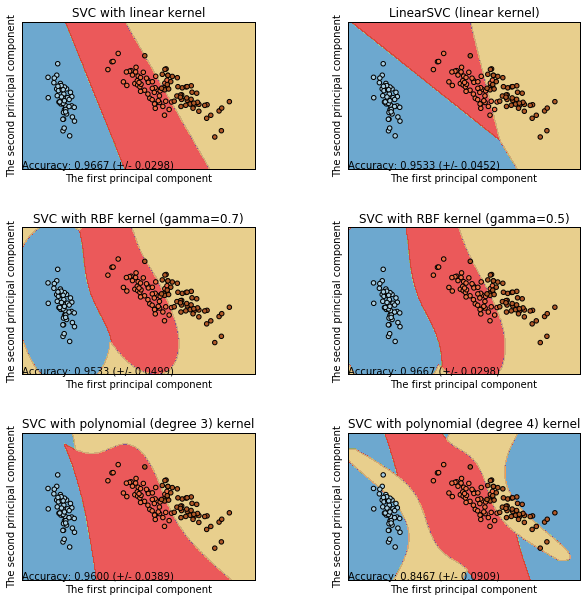

In [6]:
feature, target = conduct_PCA(df)
X, y = feature[:, :2], target
compare_SVM(X, y)

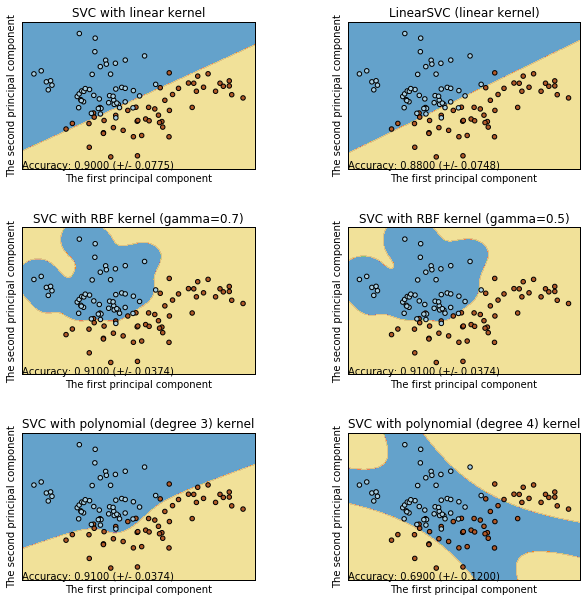

In [7]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
import urllib
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/ToyData_linear.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
urllib.urlretrieve(url, 'ToyData_linear.txt')
import pandas as pd # データフレームワーク処理のライブラリをインポート
df = pd.read_csv("ToyData_linear.txt", sep='\t', na_values=".") # データの読み込み
feature, target = conduct_PCA(df)
X, y = feature[:, :2], target
compare_SVM(X, y)

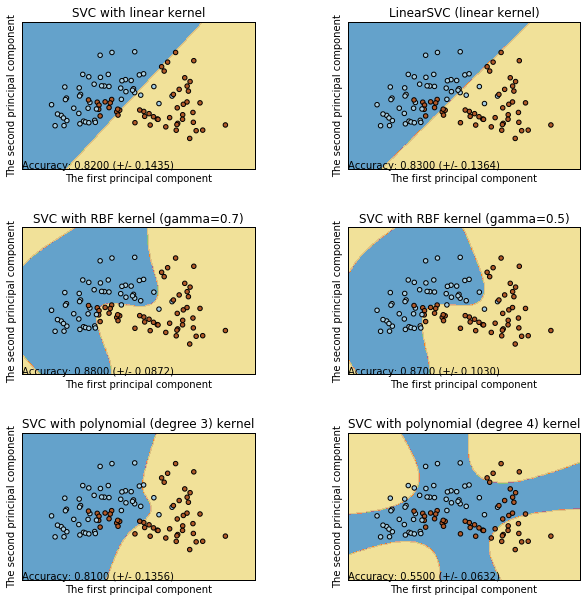

In [8]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
import urllib
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/ToyData_moons.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
urllib.urlretrieve(url, 'ToyData_moons.txt')
import pandas as pd # データフレームワーク処理のライブラリをインポート
df = pd.read_csv("ToyData_moons.txt", sep='\t', na_values=".") # データの読み込み
feature, target = conduct_PCA(df)
X, y = feature[:, :2], target
compare_SVM(X, y)

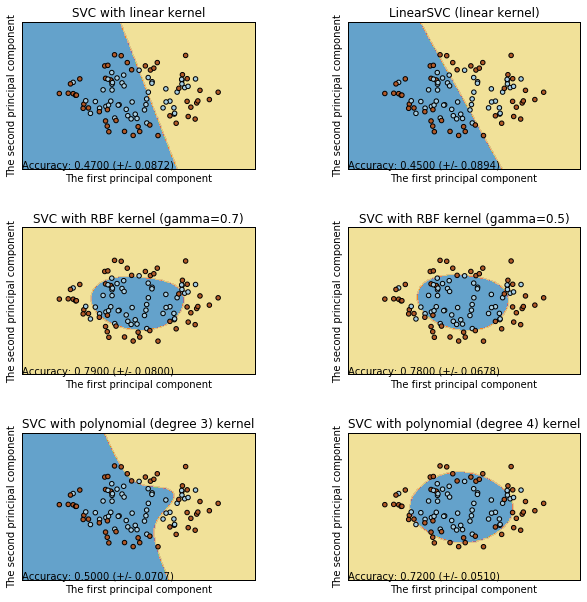

In [9]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
import urllib
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/ToyData_circles.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
urllib.urlretrieve(url, 'ToyData_circles.txt')
import pandas as pd # データフレームワーク処理のライブラリをインポート
df = pd.read_csv("ToyData_circles.txt", sep='\t', na_values=".") # データの読み込み
feature, target = conduct_PCA(df)
X, y = feature[:, :2], target
compare_SVM(X, y)

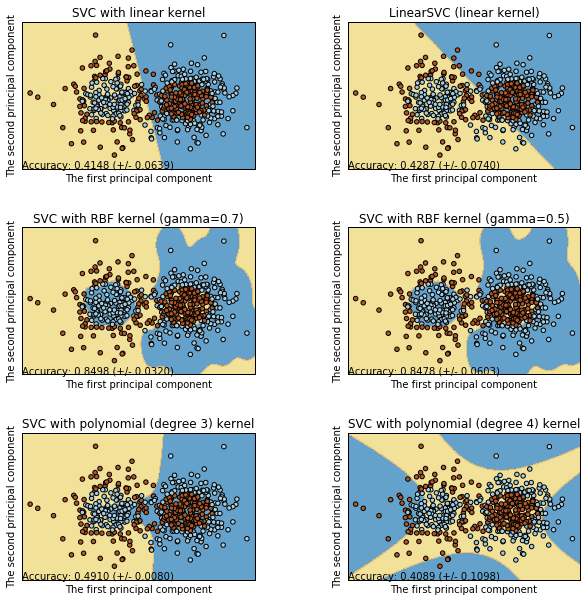

In [10]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
import urllib
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/ToyData_gaussian_quantiles.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
urllib.urlretrieve(url, 'ToyData_gaussian_quantiles.txt')
import pandas as pd # データフレームワーク処理のライブラリをインポート
df = pd.read_csv("ToyData_gaussian_quantiles.txt", sep='\t', na_values=".") # データの読み込み
feature, target = conduct_PCA(df)
X, y = feature[:, :2], target
compare_SVM(X, y)

お疲れ様でした。他の教材は随時下記に追加予定です。→ [IPython Notebook](https://sites.google.com/site/masaakikotera/8-python/8-2-ipython-notebook)